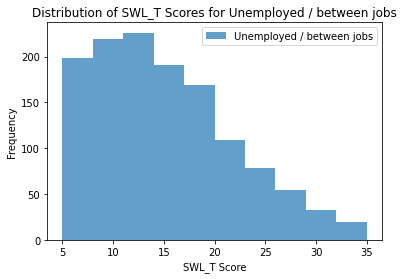

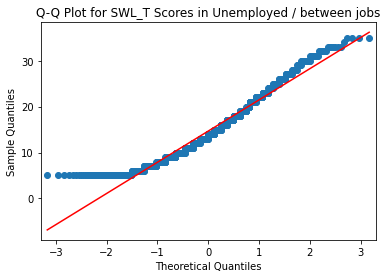

Shapiro-Wilk Test for Unemployed / between jobs: statistic=0.953, p-value=0.0000
Kolmogorov-Smirnov Test for Unemployed / between jobs: statistic=1.000, p-value=0.0000
---


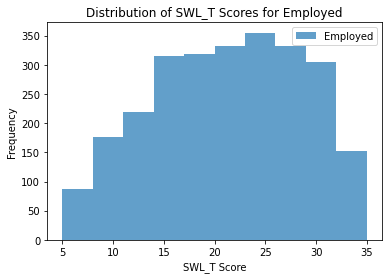

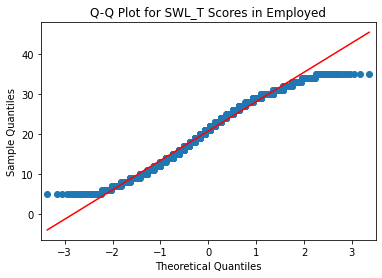

Shapiro-Wilk Test for Employed: statistic=0.978, p-value=0.0000
Kolmogorov-Smirnov Test for Employed: statistic=1.000, p-value=0.0000
---


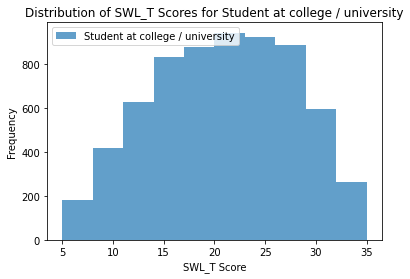

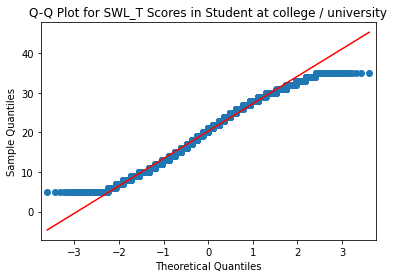

Shapiro-Wilk Test for Student at college / university: statistic=0.984, p-value=0.0000
Kolmogorov-Smirnov Test for Student at college / university: statistic=1.000, p-value=0.0000
---


/home/hp/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


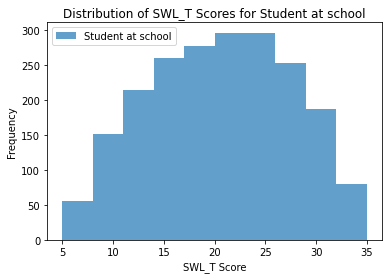

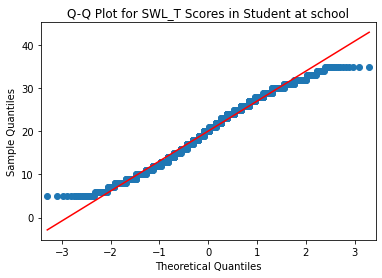

Shapiro-Wilk Test for Student at school: statistic=0.983, p-value=0.0000
Kolmogorov-Smirnov Test for Student at school: statistic=1.000, p-value=0.0000
---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, kstest

# Assuming you have the 'df_filtered' DataFrame from the previous step

path = "gaming_processed_3.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()
df.shape

df_filtered = df[df['Work'].isin(['Employed', 'Student at school', 'Student at college / university', 'Unemployed / between jobs'])]

# Loop through each Work category
for category in df_filtered["Work"].unique():
    subset_data = df_filtered[df_filtered["Work"] == category]["SWL_T"]

    # Check if there are enough data points for testing
    if len(subset_data) < 3:
        print(f"Insufficient data points for normality test in category: {category}")
        continue  # Skip to the next category

    # Histogram
    plt.hist(subset_data, bins=10, alpha=0.7, label=category)
    plt.xlabel("SWL_T Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Distribution of SWL_T Scores for {category}")
    plt.show()

    # Q-Q Plot
    sm.qqplot(subset_data, line='s')
    plt.title(f"Q-Q Plot for SWL_T Scores in {category}")
    plt.show()

    # Shapiro-Wilk Test
    stat, p_value = shapiro(subset_data)
    print(f"Shapiro-Wilk Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")

    # Kolmogorov-Smirnov Test (comparing to normal distribution)
    stat, p_value = kstest(subset_data, 'norm')
    print(f"Kolmogorov-Smirnov Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")
    print("---")

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' DataFrame and 'SPIN_T' values for each category

# Create Empty Arrays for Each Category
employed_swl_t = np.array([])
unemployed_swl_t = np.array([])
student_college_swl_t = np.array([])
student_school_swl_t = np.array([])

# Loop through DataFrame and Populate Arrays
for index, row in df.iterrows():
    work_category = row["Work"]
    swl_t_value = row["SWL_T"]
    
    if work_category == "Employed":
        employed_swl_t = np.append(employed_swl_t, swl_t_value)
    elif work_category == "Unemployed / between jobs":
        unemployed_swl_t = np.append(unemployed_swl_t, swl_t_value)
    elif work_category == "Student at college / university":
        student_college_swl_t = np.append(student_college_swl_t, swl_t_value)
    elif work_category == "Student at school":
        student_school_swl_t = np.append(student_school_swl_t, swl_t_value)

# Perform Kruskal-Wallis H Test
h_statistic, p_value = stats.kruskal(employed_swl_t, 
                                      unemployed_swl_t, 
                                      student_college_swl_t,
                                      student_school_swl_t)

print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: 707.8161221279004
p-value: 4.238327774630253e-153


In [3]:
import pandas as pd

# Convert DataFrame to long format
melted_df = pd.melt(df_filtered, id_vars=['Work'], value_vars=['SWL_T'], var_name='Category', value_name='SWL_T_value')

# Display the melted DataFrame
melted_df = melted_df.drop(columns = ["Category"])
melted_df.head()

,Work,SWL_T_value
0,Unemployed / between jobs,23
1,Unemployed / between jobs,16
2,Employed,17
3,Employed,14
4,Employed,16


In [4]:
import pingouin as pg

# Perform Games-Howell post hoc test
posthoc = pg.pairwise_gameshowell(data=melted_df, dv='SWL_T_value', between='Work')
posthoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Employed,Student at college / university,20.777949,20.347116,0.430833,0.167918,2.565728,4504.762839,5.056784e-02,0.061132
1,Employed,Student at school,20.777949,20.077295,0.700654,0.210414,3.329882,4531.571732,4.853719e-03,0.097501
2,Employed,Unemployed / between jobs,20.777949,14.666410,6.111539,0.237688,25.712434,2786.050277,0.000000e+00,0.851170
3,Student at college / university,Student at school,20.347116,20.077295,0.269822,0.175168,1.540357,3456.917074,4.133964e-01,0.038945
4,Student at college / university,Unemployed / between jobs,20.347116,14.666410,5.680706,0.207136,27.424984,1868.131797,0.000000e+00,0.823369
5,Student at school,Unemployed / between jobs,20.077295,14.666410,5.410885,0.242864,22.279482,2802.283619,9.431345e-13,0.784460


In [5]:
# Filter pairs with high significance (p < 0.05)
high_significance_pairs = posthoc[posthoc['pval'] < 0.05]
high_significance_pairs

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
1,Employed,Student at school,20.777949,20.077295,0.700654,0.210414,3.329882,4531.571732,4.853719e-03,0.097501
2,Employed,Unemployed / between jobs,20.777949,14.666410,6.111539,0.237688,25.712434,2786.050277,0.000000e+00,0.851170
4,Student at college / university,Unemployed / between jobs,20.347116,14.666410,5.680706,0.207136,27.424984,1868.131797,0.000000e+00,0.823369
5,Student at school,Unemployed / between jobs,20.077295,14.666410,5.410885,0.242864,22.279482,2802.283619,9.431345e-13,0.784460


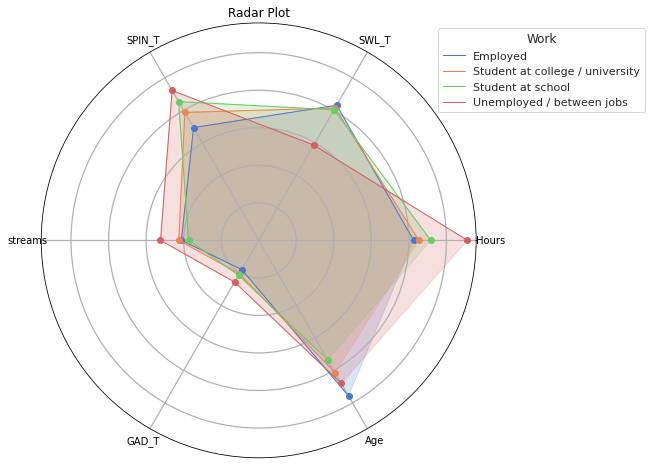

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv("gaming_processed.csv")
# data = data.dropna['GAD_T']

# Prepare the data
selected_columns = ['Hours', 'SWL_T', 'SPIN_T', 'streams', 'Work', 'GAD_T', 'Age']
data = data[selected_columns]

# Aggregate the data
grouped_data = data.groupby('Work').mean()

# Plot the radar chart
labels = ['Hours', 'SWL_T', 'SPIN_T', 'streams', 'GAD_T', 'Age']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.title('Radar Plot')

ax.grid(linewidth=1.25)

# colors = ['blue', 'brown', 'green', 'red']
colors = sns.color_palette('muted', n_colors=4)


for i, (idx, row) in enumerate(grouped_data.iterrows()):
    values = row.values.flatten().tolist()
    color = colors[i]  # Get color for this category
    
    # Close the plot
    values += values[:1]
    ax.plot(angles, values[:-1], linewidth=1, linestyle='solid', label=idx, color=color)  # Increase linewidth for sharper lines
    ax.fill(angles, values[:-1], alpha=0.2, color=color)  # Fill area between levels with color

    # Add dot points at the intersection points
    for angle, value in zip(angles, values[:-1]):
        ax.plot(angle, value, 'o', color=color)
        # Add value at each axis
        # ax.text(angle, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# Set Seaborn style and color palette
ax.spines['polar'].set_color('black')
sns.set(style="whitegrid")

# Add legend
plt.legend(title='Work', loc='upper left', bbox_to_anchor=(0.9, 1))
plt.savefig('radar_plot.png', bbox_inches='tight')
plt.show()

In [7]:
plt.savefig('radar_plot.png', bbox_inches='tight')


<Figure size 432x288 with 0 Axes>